In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [5]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
y = true_salaries + noise  # Final dependent variable with noise

In [7]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(x)  # Transforming x to polynomial features, changed X to x

In [9]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, y)  # Training the model, changed Y to y

LinearRegression()

In [10]:
# Step 5: Get the values of slope (m) and intercept (c) from the trained model
m = model.coef_[0]  # Coefficient (slope) of the regression line
c = model.intercept_  # Intercept (where the line crosses the Y-axis)

print(m)

0.0


In [11]:
print(c)

25.834848216909293


In [12]:
#step 6:Display the equation of the line
print(f"Equation of the line: Y = {m:.2f}X + {c:.2f}")

Equation of the line: Y = 0.00X + 25.83


In [14]:
#step 7:predict values using the model
Y_pred=model.predict(X_poly) # Changed x to X_poly to match the features used during training
print(Y_pred)

[31.52544525 37.07102251 42.47157998 47.72711768 52.8376356  57.80313374
 62.62361211 67.29907069 71.8295095  76.21492852]


In [16]:
#mean square error mean absoulte error
#-> MEasures avg squared difference between actual and predicted values
mse=mean_squared_error(y,Y_pred) # Changed Y to y
print(f"mean squared error:{mse:.2f}")

mean squared error:11.47


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import both functions
#Measures avg absolute difference between actual and predicted values
mae = mean_absolute_error(y, Y_pred)  # Changed Y to y to use the actual target values
print(f"mean absolute error: {mae:.2f}")

mean absolute error: 2.98


In [19]:
#Root Mean Squared Error ->MEasures standard deviation of residuals
rsme = np.sqrt(mse)
print(f"Root Mean Squared Error : {rsme:.2f}")

Root Mean Squared Error : 3.39


In [21]:
#R-Sqaured(R^2) -> Represents how well the model fits the data (0 to 1 , where 1 is best )
from sklearn.metrics import r2_score # Import the r2_score function
r2=r2_score(y,Y_pred) # Changed 'Y' to 'y' to use the actual target values for R-squared calculation
print(f"R-Squared(R^2):{r2:.2f}")

R-Squared(R^2):0.95


In [23]:
#5.Adjsuted R-squared(R^2_adj) -> Adjusted for the number of predictors,better for multiplie regressions
n=len(y)  # Changed 'Y' to 'y' to use the actual target values for calculating 'n'
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-square:{adj_r2:.2f}")

Adjusted R-square:0.94


In [25]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
import statsmodels.api as sm  # Import the statsmodels library and alias it as 'sm'

X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(y, X_ols).fit()  # Fit OLS model, Changed 'Y' to 'y' to match the actual target variable name
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        08:04:20   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


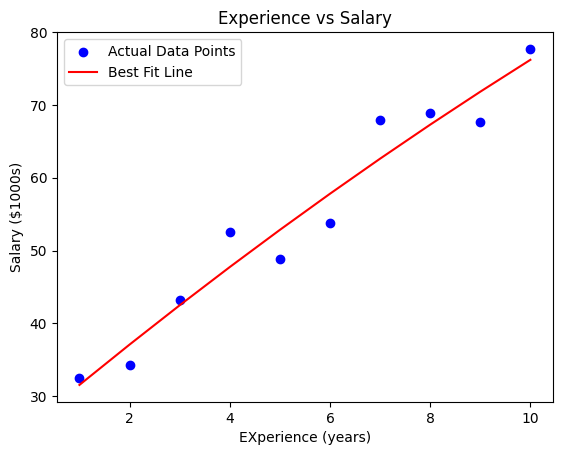

In [27]:
#step:8#plot actual data points
plt.scatter(x, y ,color='blue',label='Actual Data Points') # Changed 'Y' to 'y'

#step 9:Plot the Regression line (Best fit Line)
plt.plot(x,Y_pred,color='red',label='Best Fit Line')

plt.xlabel("EXperience (years)")
plt.ylabel("Salary ($1000s)")
plt.title("Experience vs Salary")
plt.legend()
plt.show()

In [29]:
#  Step 12: Prediction of the features

#User can input experience, and the model will predict salary

while True:

    try:

        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit):"))

        if exp <= -1:

            break

        predicted_salary = model.predict(np.array([[exp]]))[0]

        print(f"Predicted salary for {exp} years of experience: ${predicted_salary:.2f}K")

    except ValueError:

        print("Please enter a valid number")



Enter years of experience to predict salary (or -1 to exit):8
Please enter a valid number

Enter years of experience to predict salary (or -1 to exit):2
Please enter a valid number

Enter years of experience to predict salary (or -1 to exit):1
Please enter a valid number

Enter years of experience to predict salary (or -1 to exit):-1
